<a href="https://colab.research.google.com/github/chandagrover/Machine-Learning/blob/master/4WithoutProperty_SMILEVAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Installs and Imports**

In [1]:
# 10 tricks for a better Google Colab experience
# https://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82
# %load_ext google.colab.data_table

In [2]:
!sudo apt-get install software-properties-common
!sudo add-apt-repository ppa:ubuntu-toolchain-r/test
!sudo apt-get update
!sudo apt-get install gcc-4.9
!sudo apt-get upgrade libstdc++6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.96.24.32.14).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
 Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

 More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:8 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic InRelease
Hit:9 http

In [1]:
# !pip install keras==2.2.4
%tensorflow_version 1.x
import keras
import tensorflow as tf
print("Keras: %s"%keras.__version__)
print("Tensorflow: %s"%tf.__version__)


TensorFlow 1.x selected.


Using TensorFlow backend.


Keras: 2.3.1
Tensorflow: 1.15.2


In [4]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2021-01-06 07:10:57--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh [following]
--2021-01-06 07:10:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ failed with 

In [5]:
# !strings /usr/lib/x86_64-linux-gnu/libstdc++.so.6 | grep GLIBCXX

In [6]:
# General Imports
import os
import pandas as pd
import numpy as np
import sklearn
import rdkit

from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
from matplotlib import pyplot as plt
import re
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

# FOR VAE Architecture 
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
print("RDKit: %s"%rdkit.__version__)
# Checking if GPU is enabled or not
tf.test.gpu_device_name()



RDKit: 2020.09.3


'/device:GPU:0'

# **Data Fetching**

In [7]:
# mount Google Drive
from google.colab import drive
drive.mount('/drive')
WEIGHTS_FOLDER = 'sample_data/weights/'
import csv
# smifile ='/drive/My Drive/ZINC/Data/ZINC_Data/SMILEWithProp.csv'      #"sample_data/SMILEWithoutProp.csv"
# data = pd.read_csv(smifile, delimiter = ",", header='infer', encoding='utf-8')
smifile ='/drive/My Drive/ZINC/Data/ZINC_Data/AAAA.smi'      
data = pd.read_csv(smifile, delimiter = " ", header='infer', encoding='utf-8')
data.smiles = data.smiles.replace('\n','', regex=True)
NUM_SMILES = len(data)
data.head()

Mounted at /drive


,smiles,zinc_id
0,Cn1cnc2c1c(=O)n(C)c(=O)n2C,ZINC000000001084
1,O=C(O)[C@@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,ZINC000000001169
2,Cn1c2nncnc2c(=O)n(C)c1=O,ZINC000000001447
3,Cn1cnc2c1c(=O)[nH]c(=O)n2C,ZINC000000002151
4,NC(=O)c1ncc[nH]c1=O,ZINC000000008657


In [8]:
from sklearn.model_selection import train_test_split
smiles_train, smiles_test = train_test_split(data, test_size=0.2, shuffle=False)
print(smiles_train.shape)
print(smiles_test.shape)
print(NUM_SMILES)

(3032, 2)
(759, 2)
3791


In [11]:
# logP_train = smiles_train['logP']
# logP_test = smiles_test['logP']

# qed_train=smiles_train['qed']
# qed_test=smiles_test['qed']

# SAS_train=smiles_train['SAS']
# SAS_test=smiles_test['SAS']

# train=np.array([SAS_train])   #logP_train, qed_train, SAS_train
# test= np.array([SAS_test])             #logP_test, qed_test, SAS_test
# y_train_property=train.transpose()
# y_test_property=test.transpose()

In [12]:
#Labels for the Smiles String. We will deal with three properties values.
# print(type(y_train_property))
# print(type(y_test_property))
# print(y_train_property.shape)
# print(y_test_property.shape)

### **Vector Representation of Data**

In [9]:
charset = set("".join(list(data.smiles))+"!E")
char_to_int = dict((c,i) for i,c in enumerate(charset))
int_to_char = dict((i,c) for i,c in enumerate(charset))
# embed = max([len(smile) for smile in data.smiles]) + 5
embed = max([len(smile) for smile in data.smiles])+2
# print(char_to_int)
print(int_to_char)
print(len(charset), embed)
# print(embed)

{0: 'c', 1: '!', 2: 'i', 3: '@', 4: '5', 5: '-', 6: 'S', 7: 'C', 8: 'O', 9: 'N', 10: 's', 11: '1', 12: 'E', 13: 'o', 14: '=', 15: '#', 16: 'P', 17: ')', 18: '4', 19: 'B', 20: 'F', 21: '6', 22: '[', 23: ']', 24: '/', 25: '2', 26: '3', 27: '+', 28: '\\', 29: 'n', 30: 'H', 31: '('}
32 58


In [10]:
def vectorize(smiles):
        onehot_flatList=[[]]
        one_hot =  np.zeros((smiles.shape[0], embed , len(charset)),dtype=np.int8)
        print(one_hot.shape)
        for i,smile in enumerate(smiles):
            #encode the startchar
            one_hot[i,0,char_to_int["!"]] = 1
            #encode the rest of the chars
            for j,c in enumerate(smile):
                one_hot[i,j+1,char_to_int[c]] = 1
            #Encode endchar
            one_hot[i,len(smile)+1:,char_to_int["E"]] = 1
        #Return two, one for input and the other for output
        return one_hot[:,:,:]

X_train= vectorize(smiles_train['smiles'].values)
X_test = vectorize(smiles_test['smiles'].values)

(3032, 58, 32)
(759, 58, 32)


### **Checking if Vectorization works!!**

O=C1NC(=O)C(O)(O)C(=O)N1


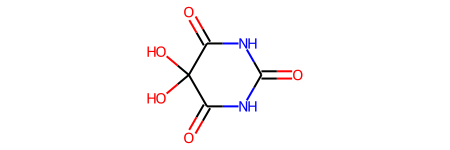

In [11]:
idx=600
print(smiles_train['smiles'][idx])
from rdkit.Chem.Draw import IPythonConsole
mol = Chem.MolFromSmiles(smiles_train['smiles'][idx])
mol

24
O=C1NC(=O)C(O)(O)C(=O)N1


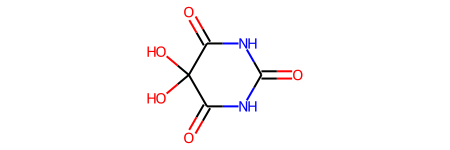

In [12]:
# Going back from vectorized form back to a readable string
smi="".join([int_to_char[idx] for idx in np.argmax(X_train[idx,:,:], axis=1)])
# String After Tructation of extra symbols
smi = re.sub('[!E]', '', smi)
print(len(smi))
print(smi)
mol = Chem.MolFromSmiles(smi)
mol

In [13]:
mol_size_x=X_train.shape[1]
mol_size_y=X_train.shape[2]
orig_dim = mol_size_x * mol_size_y
# print(mol_size_x)
# print(mol_size_y)
print(orig_dim)
X_train = np.reshape(X_train, [-1, orig_dim])
X_test = np.reshape(X_test, [-1, orig_dim])
# print(type(X_train))
# print(X_train.shape)
# print(X_train.shape[1])

1856


# **VAE**

In [15]:
# Network Parameters
INPUT_DIM=(orig_dim,)   # SMILES dimension
intermediate_dim=512
BATCH_SIZE=5
Z_DIM=20 # Dimension of the latent vector (z)
epochs=50
pre_trained=False

### **Encoder**

In [16]:
# ENCODER
def build_vae_encoder(input_dim, output_dim):
  
  # Clear tensorflow session to reset layer
  global K
  K.clear_session()
  
  # Define model input
  encoder_input = Input(shape = input_dim, name = 'encoder_input')
  
  #Intermediate layer
  x = Dense(intermediate_dim,activation='relu', name='hidden')(encoder_input)
 
  #Model Output
  mean_mu = Dense(output_dim, name = 'mu')(x)
  log_var = Dense(output_dim, name = 'log_var')(x)

  # Defining a function for sampling
  def sampling(args):
    mean_mu, log_var = args
    epsilon = K.random_normal(shape=K.shape(mean_mu), mean=0., stddev=1.) 
    return mean_mu + K.exp(log_var/2)*epsilon   
  
  # Using a Keras Lambda Layer to include the sampling function as a layer in the model
  encoder_output = Lambda(sampling, output_shape=(2,), name='encoder_output')([mean_mu, log_var])

  return encoder_input, encoder_output, mean_mu, log_var, Model(encoder_input, encoder_output, name='encoder')



### **Decoder**

In [17]:
# Decoder
def build_decoder(input_dim, output_dim):

  # Define model input
  decoder_input = Input(shape = (input_dim,) , name = 'decoder_input')
  
  #Intermediate Layer
  x = Dense(intermediate_dim, activation='relu', name='hidden')(decoder_input)

    # Define model output
  decoder_output = Dense(output_dim, activation='sigmoid', name='decoder_lastlayer')(x)


  return decoder_input, decoder_output, Model(decoder_input, decoder_output, name='decoder')




### **Predictor**

In [21]:
# def create_predictor_linear():
#     '''
#     Creates a regressor that estimates property values 
#     from latent variables.
#     '''
#     predictor_input = layers.Input(shape=(Z_DIM,), name='predictor_input', dtype='float32')
    
#     x = layers.Dense(10, activation='relu', name='hidden')(predictor_input)
#     x = layers.Dense(1, activation='linear', name='predictor_lastlayer', dtype='float32')(x)
#     return Model(predictor_input, x, name='predictor')


### **Creating the OverAll Model**

In [18]:
# Model Creation 
def create_model():

  #Creating Encoder
  vae_encoder_input, vae_encoder_output,  mean_mu, log_var, vae_encoder  = build_vae_encoder(input_dim = INPUT_DIM,                                                                                         output_dim = Z_DIM)
# vae_encoder.summary()
  
  
  #Creating Decoder
  vae_decoder_input, vae_decoder_output, vae_decoder = build_decoder(input_dim = Z_DIM, output_dim=orig_dim)
# vae_decoder.summary()

  # #Creating the Predictor
  # predictor = create_predictor_linear()
  # t_predicted = predictor(mean_mu)
  


  #Creating the VAE Model 
  vae_input = vae_encoder_input

  # Output will be the output of the decoder. The term - decoder(encoder_output) 
  vae_output = vae_decoder(vae_encoder_output)

  # # VAE Model with Predictor
  # vae_predictor = Model(vae_input, [vae_output,t_predicted], name='VAE_with_Predictor')
# VAE Model without Property Predictor
  vae_without_predictor = Model(vae_input, vae_output, name='VAE_without_Predictor')



  return vae_encoder_input, vae_encoder_output,  mean_mu, log_var, vae_encoder, vae_decoder_input, vae_decoder_output, vae_decoder, vae_input, vae_output, vae_without_predictor

#Creating the overall Model
encoder_input, encoder_output,  mean_mu, log_var, encoder, decoder_input, decoder_output, decoder, vae_input, vae_output, vae_without_predictor = create_model()



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### **VAE Loss Function**

In [19]:
#VAE Loss Function
def vae_loss(vae_input, vae_output):
  reconstruction_loss = binary_crossentropy(vae_input, vae_output)
  reconstruction_loss = reconstruction_loss * orig_dim
    
  kl_loss = 1 + log_var - K.square(mean_mu) - K.exp(log_var)
  kl_loss = K.sum(kl_loss, axis=-1)    
  kl_loss = kl_loss * -0.5
  kl_weight=0.5
  reconst_weight=0.5
    
  # vae_loss_val = K.mean(reconstruction_loss + kl_loss)
  vae_loss_val=kl_weight * kl_loss + reconst_weight * reconstruction_loss
  return vae_loss_val


**Plotting all models**

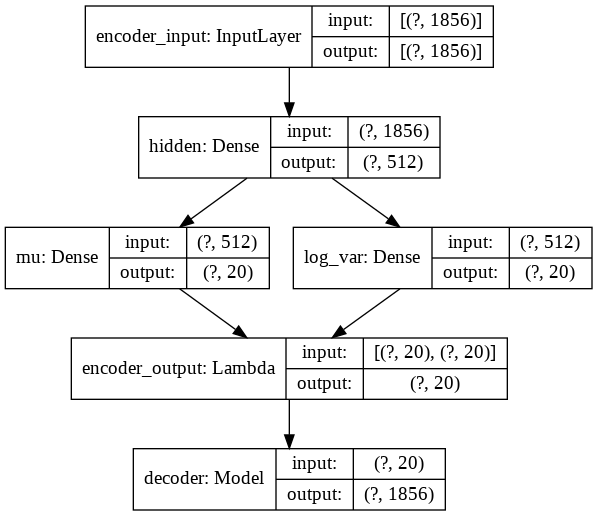

In [20]:
# Plot the Encoder Model
plot_model(encoder, to_file='/drive/My Drive/ZINC/Models/WithoutProperty/Diagram/only_encoder.png', show_shapes=True, show_layer_names=True)  #, expand_nested=True

# Plot the Decoder Model
plot_model(decoder, to_file='/drive/My Drive/ZINC/Models/WithoutProperty/Diagram/only_decoder.png', show_shapes=True, show_layer_names=True)    #, expand_nested=True

# #Plot the Predictor Model
# plot_model(predictor, to_file='/drive/My Drive/ZINC/Models/WithoutProperty/Diagram/only_predictor.png', show_shapes=True, show_layer_names=True)    #, expand_nested=True

# Plot the VAE-Predictor Model
plot_model(vae_without_predictor, to_file='/drive/My Drive/ZINC/Models/WithoutProperty/Diagram/smilesvae_without_predictor.png', show_shapes=True, show_layer_names=True)   #, expand_nested=False

# plot_model(vae_model, to_file='smilesvae_model.png', show_shapes=True, show_layer_names=True)   #, expand_nested=False

**Checkpoint**

In [21]:
# Creating Model Checkpoint for training...

checkpoint_path = "/drive/My Drive/ZINC/Models/WithoutProperty/Weights/train_ckpt/cp.ckpt"
new_check_path="/drive/My Drive/ZINC/Models/WithoutProperty/Weights/VAE_Without_Predictor{epoch:02d}-{val_loss:.2f}.h5"           #'VAE_Predictor{epoch:02d}.h5'
# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=new_check_path, verbose=1, save_weights_only=False, save_best_only=True)   #, save_freq=5

# Loading weights from the latest checkpoints
#get the latest checkpoint file
checkpoint_dir = os.path.dirname(new_check_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)

### **Training or Loading the VAE Model**

In [22]:
pre_trained=False
epochs=100
if __name__ == '__main__':          
#     Train the Variational AutoEncoder
    if pre_trained==False:
      vae_without_predictor.compile(optimizer='adam', 
                      loss=[vae_loss]) 
      history = vae_without_predictor.fit(x=X_train,
                            y=[X_train], 
                            epochs=epochs,
                            validation_data=(X_test, [X_test]),
                            verbose=2,
                            callbacks=[cp_callback] )  
      vae_without_predictor.save(new_check_path)
    else:
      vae_without_predictor.load_weights(new_check_path)
      history = vae_without_predictor.fit(x=X_train,
                            y=[X_train], 
                            epochs=epochs,
                            validation_data=(X_test, [X_test]),
                            verbose=2,
                            callbacks=[cp_callback]) 
      vae_without_predictor.save(new_check_path)
    

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3032 samples, validate on 759 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 62.61004, saving model to /drive/My Drive/ZINC/Models/WithoutProperty/Weights/VAE_Without_Predictor01-62.61.h5
3032/3032 - 9s - loss: 113.8547 - val_loss: 62.6100
Epoch 2/100

Epoch 00002: val_loss improved from 62.61004 to 55.02088, saving model to /drive/My Drive/ZINC/Models/WithoutProperty/Weights/VAE_Without_Predictor02-55.02.h5
3032/3032 - 1s - loss: 53.6205 - val_loss: 55.0209
Epoch 3/100

Epoch 00003: val_loss improved from 55.02088 to 50.58569, saving model to /drive/My Drive/ZINC/Models/WithoutProperty/Weights/VAE_Without_Predictor03-50.59.h5
3032/3032 - 1s - loss: 47.7353 - val_loss: 50.5857
Epoch 4/100

Epoch 00004: val_loss improved from 50.58569 to 47.36826, saving model to /drive/My Drive/ZINC/Models/WithoutProperty/Weights/VAE_Without_Predictor04-47.37.h5
3032/3032 - 1s - loss:

In [23]:
# print(type(history))
# print(type(history.history))
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


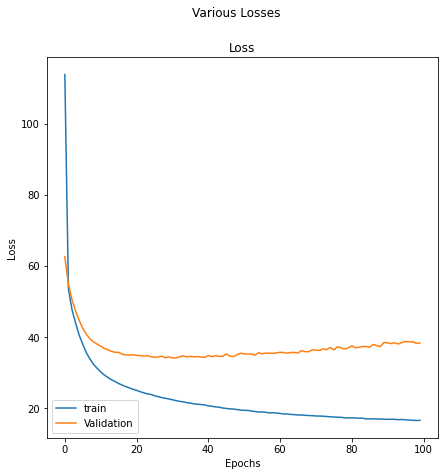

In [24]:
# summarize history for loss
fig, (ax1) = plt.subplots(1, 1, figsize=(7,7))
fig.suptitle('Various Losses')


ax1.plot(history.history['loss'])
ax1.plot( history.history['val_loss'])
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(['train', 'Validation'], loc='lower left')


# ax2.plot(history.history['decoder_loss'])
# ax2.plot(history.history['val_decoder_loss'])
# ax2.set_title('Decoder Loss')
# ax2.set_xlabel('Epochs')
# ax2.set_ylabel('Decoder Loss')
# ax2.legend(['train', 'Validation'], loc='lower left')

# ax3.plot(history.history['predictor_loss']) 
# ax3.plot(history.history['val_predictor_loss'])
# ax3.set_title('Predictor Loss')
# ax3.set_xlabel('Epochs')
# ax3.set_ylabel('Predictor Loss')
# ax3.legend(['train', 'Validation'], loc='lower left')

# **Latent Space Visualization**

### **Each Component of latent space**

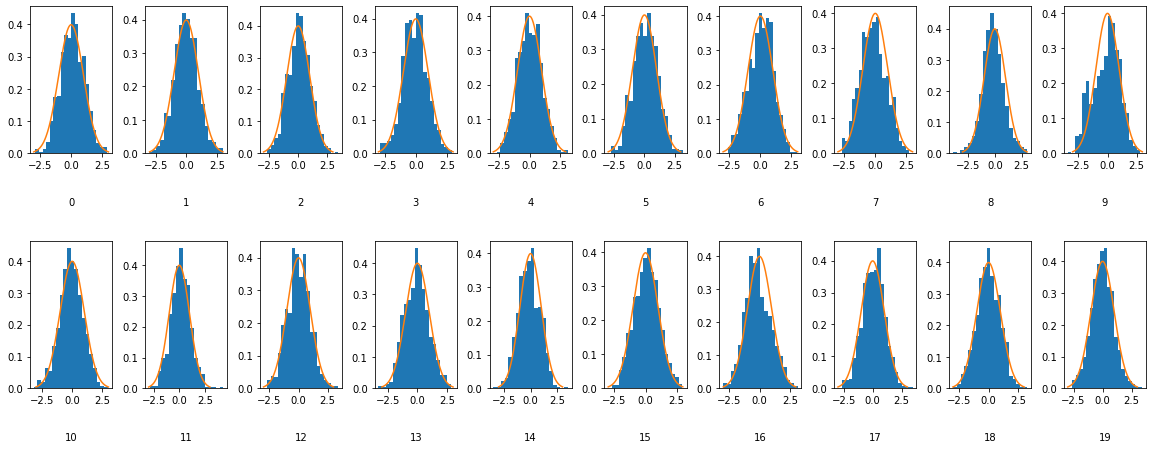

In [26]:
from scipy.stats import norm
# with graph.as_default():   # We are using this statement to reuse the last saved trained model
z_test = encoder.predict(X_test)

x = np.linspace(-3, 3, 300)

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(20):
    ax = fig.add_subplot(5, 10, i+1)
    ax.hist(z_test[:,i], density=True, bins = 20)
    ax.axis('on')
    ax.text(0.5, -0.35, str(i), fontsize=10, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))

plt.show()

In [30]:
# from sklearn.manifold import TSNE
# z_mean = encoder.predict(X_test)
# # print(z_mean)
# model_name='VAESMILES_Latent'
# os.makedirs(model_name, exist_ok=True)
# filename = os.path.join(model_name, "smilesvae_mean.png")

# # z_embedded = TSNE(n_components=2).fit_transform(z_mean)
# plt.figure(figsize=(7,7))
# plt.scatter(z_mean[:, 0], z_mean[:, 1], c=SAS_test)
# plt.colorbar()
# plt.xlabel("z[0]")
# plt.ylabel("z[1]")
# plt.title('SAS on test data')
# plt.savefig(filename)
# plt.show()

# **Reconstruction**


In [31]:
# # Calculating mean and standard deviation of all property values on test data

# SAS_mean_test= np.mean(y_test_property, axis=0)
# SAS_std_test = np.std(y_test_property, axis=0)


In [27]:
# encoded, decoded and predicted data on test dataset

encoded_xtest=encoder.predict(X_test)
# predicted_xtest=predictor.predict(encoded_xtest)
decoded_xtest=decoder.predict(encoded_xtest)
print(encoded_xtest.shape)
# print(predicted_xtest.shape)
print(decoded_xtest.shape)

# Reshaping the original and reconstructed test data
orig_test=X_test.reshape(len(X_test), mol_size_x, mol_size_y)
reconst_test = decoded_xtest.reshape(len(X_test), mol_size_x,mol_size_y)
print(orig_test.shape)
print(reconst_test.shape)

(759, 20)
(759, 1856)
(759, 58, 32)
(759, 58, 32)


### **Reconstruction and Prediction on Original test data set**

In [42]:
# Going back from vectorized form back to a readable string on original test data
IPythonConsole.ipython_useSVG=True 
mols_orig_test= []
smi_orig_test=[]
syntax_val={0:[], 1:[]}

for id in range(len(X_test)):
  smi="".join([int_to_char[idx] for idx in np.argmax(orig_test[id,:,:], axis=1)])
  # print(len(mol))
  smi = re.sub('!|E',"", smi)
  smi_orig_test.append(smi)
  mol = Chem.MolFromSmiles(smi, sanitize=True)
  mols_orig_test.append(mol)
  if mol is None:
    syntax_val[0].append(id)
    # print('Mol', id+1, "\t length =",len(smi), "\t invalid SMILES", sep=' ')
    print(mol, end ='\n', sep= ' ')
    continue
  else:
    syntax_val[1].append(id)
    # print('Mol', id+1, "\t length =",len(smi), "\t",  smi, "\t Valid SMiles" ,sep=' ', end ='\n', flush = True)
    try:
      Chem.SanitizeMol(mol)
      # print(mol)
    except:
      print('Mol {} {}'.format(id+1, mol)) 


smi_orig_test_valid=[]
mols_orig_test_valid=[]
for item in syntax_val[1]:
  smi_orig_test_valid.append(smi_orig_test[item])
  mols_orig_test_valid.append(mols_orig_test[item])
# smi_orig_test_valid


print(len(mols_orig_test_valid), "Original Valid Test Samples")
# Draw.MolsToGridImage(mols_orig_test_valid, molsPerRow=4,subImgSize=(200,200))



759 Original Valid Test Samples



### **Reconstruction and Prediction of property on reconstructed test data**


RDKit ERROR: [07:56:15] SMILES Parse Error: syntax error while parsing: N[C@H](CC(=()O)OC[(=O)(=O)C1
RDKit ERROR: [07:56:15] SMILES Parse Error: Failed parsing SMILES 'N[C@H](CC(=()O)OC[(=O)(=O)C1' for input: 'N[C@H](CC(=()O)OC[(=O)(=O)C1'
RDKit ERROR: [07:56:15] SMILES Parse Error: syntax error while parsing: CN1CCN(C@N((O)CC1O1
RDKit ERROR: [07:56:15] SMILES Parse Error: Failed parsing SMILES 'CN1CCN(C@N((O)CC1O1' for input: 'CN1CCN(C@N((O)CC1O1'
RDKit ERROR: [07:56:15] SMILES Parse Error: unclosed ring for input: 'CS(=O)(=O)NC1CNCO'
RDKit ERROR: [07:56:15] SMILES Parse Error: syntax error while parsing: CC(=O)N[C@H]]CNOCN1
RDKit ERROR: [07:56:15] SMILES Parse Error: Failed parsing SMILES 'CC(=O)N[C@H]]CNOCN1' for input: 'CC(=O)N[C@H]]CNOCN1'
RDKit ERROR: [07:56:15] SMILES Parse Error: unclosed ring for input: 'N=C(O)C[C@@H]1COCN'
RDKit ERROR: [07:56:15] SMILES Parse Error: unclosed ring for input: 'NNC(=O)N1CC'
RDKit ERROR: [07:56:15] SMILES Parse Error: syntax error while parsing: 

Molecule 5 Original Valid O=S1(=O)CCNCCN1
Molecule 5 Reconstructed Valid O=S1(=O)CCNCCN1
Molecule 6 Original Valid COC(=O)[C@H]1CNC(=O)N1
Molecule 6 Reconstructed Valid CNC(=O)[C@H]1CNC(=O)C1
Molecule 10 Original Valid NC[C@@H]1C[C@@H](O)CN1
Molecule 10 Reconstructed Valid NC[C@@H]1C[C@@H](O)CN1OO
Molecule 11 Original Valid NC[C@H]1C[C@@H](O)CN1
Molecule 11 Reconstructed Valid OC[C@H]1C[C@@H](O)CC1
Molecule 20 Original Valid O=C(CO)CO
Molecule 20 Reconstructed Valid O=C(CO)CO
Molecule 22 Original Valid C[C@@H](O)CNCCN
Molecule 22 Reconstructed Valid C[C@@H](O)CNCC
Molecule 27 Original Valid NC[C@@H]1C[C@H](O)CN1
Molecule 27 Reconstructed Valid NC[C@@H]1C[C@H](O)CN1
Molecule 28 Original Valid NC[C@H]1C[C@H](O)CN1
Molecule 28 Reconstructed Valid OC[C@H]1C[C@H](O)CN1
Molecule 29 Original Valid CNC(=O)C[C@H]1NCCNC1=O
Molecule 29 Reconstructed Valid COC(=O)C[C@H]1NCCNC1=O
Molecule 30 Original Valid CNC(=O)C[C@@H]1NCCNC1=O
Molecule 30 Reconstructed Valid COC(=O)C[C@@H]1NCCNC1=O
Molecule 39 O

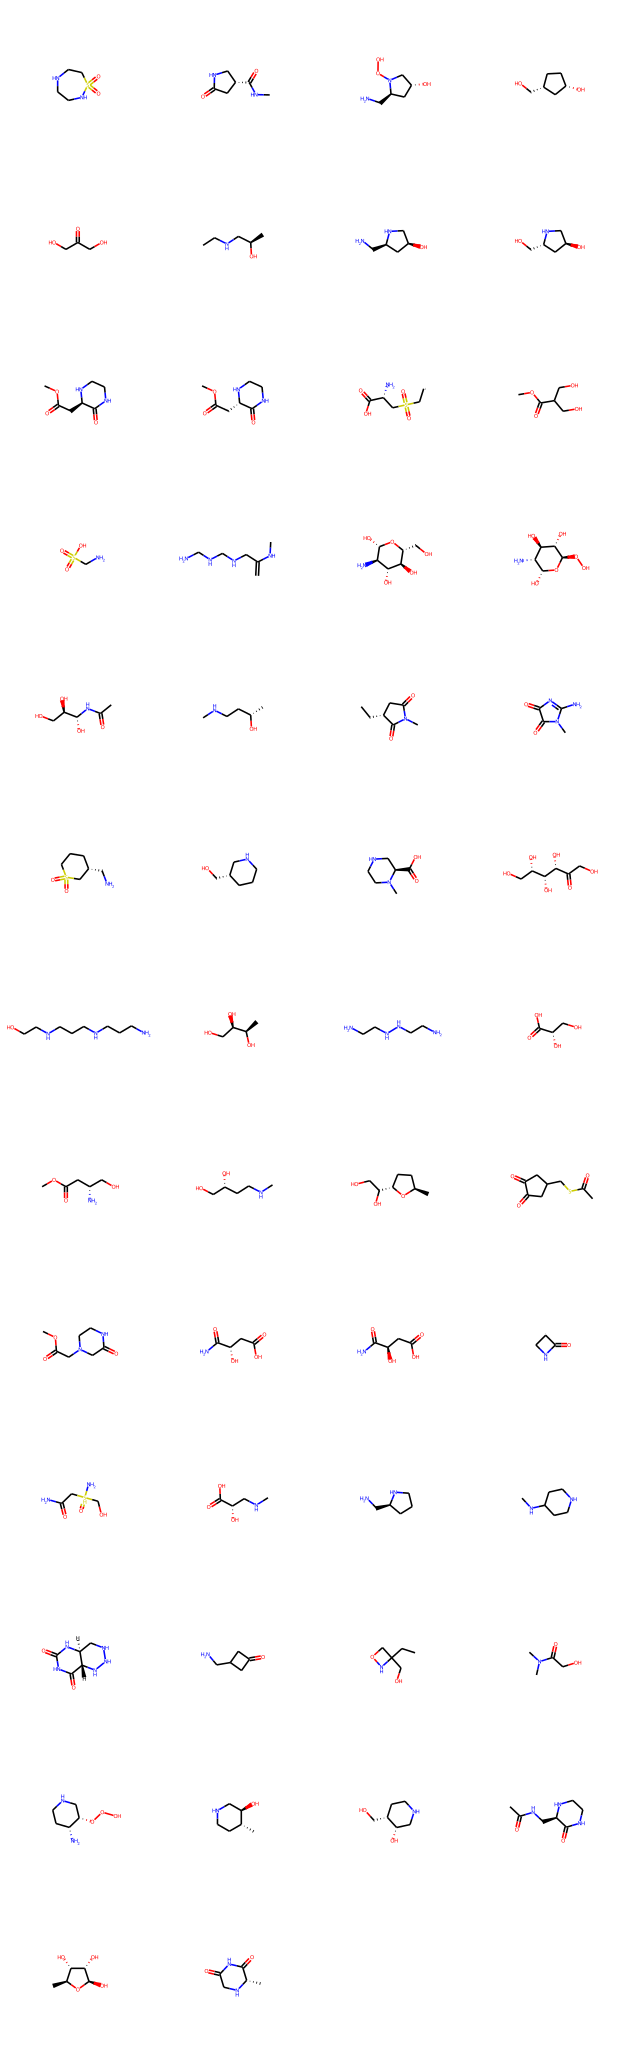

In [48]:

# Going back from vectorized form back to a readable string on original test data
#Reconstruction
syntax_val={0:[], 1:[]}
mols_reconst_test= []
smi_reconst_test=[]

for id in range(len(X_test)):
  smi="".join([int_to_char[idx] for idx in np.argmax(reconst_test[id,:,:], axis=1)])
  # print(len(mol))
  smi = re.sub('!|E',"", smi)
  smi_reconst_test.append(smi)
  mol = Chem.MolFromSmiles(smi, sanitize=True)
  mols_reconst_test.append(mol)
  if mol is None:
    syntax_val[0].append(id)
    # print('Mol', id+1, "\t length =",len(smi), "\t invalid SMILES", sep=' ')
    # print(mol, end ='\n', sep= ' ')
    continue
  else:
    syntax_val[1].append(id)
    # print('Mol', id+1, "\t length =",len(smi), "\t",  smi, "\t Valid Reconstructed Smile", sep=' ', end ='\n', flush = True)
    try:
      Chem.SanitizeMol(mol)
    except:
      print('Mol {} {}'.format(id+1, mol)) 


smi_reconst_test_valid=[]
mols_reconst_test_valid=[]
smi_orig_test_valid=[]
mols_orig_test_valid=[]

for item in syntax_val[1]:
  smi_reconst_test_valid.append(smi_reconst_test[item])
  smi_orig_test_valid.append(smi_orig_test[item])

  mols_reconst_test_valid.append(mols_reconst_test[item])
  mols_orig_test_valid.append(mols_orig_test[item])
  print("Molecule", item, "Original Valid", smi_orig_test[item] )
  print("Molecule", item, "Reconstructed Valid", smi_reconst_test[item])
print(len(mols_reconst_test_valid), "Reconstructed Valid Test Samples")
Draw.MolsToGridImage(mols_reconst_test_valid, molsPerRow=4,subImgSize=(200,200))



In [30]:
# encoded, decoded and predicted data on Training dataset

encoded_xtrain=encoder.predict(X_train)
# predicted_xtest=predictor.predict(encoded_xtrain)
decoded_xtrain=decoder.predict(encoded_xtrain)
print(encoded_xtrain.shape)
# print(predicted_xtrain.shape)
print(decoded_xtrain.shape)

# Reshaping the original and reconstructed train data
orig_train=X_train.reshape(len(X_train), mol_size_x, mol_size_y)
reconst_train = decoded_xtrain.reshape(len(X_train), mol_size_x,mol_size_y)
print(orig_train.shape)
print(reconst_train.shape)

(3032, 20)
(3032, 1856)
(3032, 58, 32)
(3032, 58, 32)


In [36]:
# print(reconst_train[2][10])
# print(orig_train[2][10])

In [49]:
# Going back from vectorized form back to a readable string on original training data
#Reconstruction

syntax_val={0:[], 1:[]}

smi_orig_train=[]
mols_orig_train= []

for id in range(len(X_train)):
  smi="".join([int_to_char[idx] for idx in np.argmax(orig_train[id,:,:], axis=1)])
  smi = re.sub('!|E',"", smi)
  smi_orig_train.append(smi)

  mol = Chem.MolFromSmiles(smi, sanitize=True)
  mols_orig_train.append(mol)
  if mol is None:
    syntax_val[0].append(id)
    # print('Mol', id+1, "\t length =",len(mol), "\t invalid SMILES", sep=' ')
    # print(mol, end ='\n', sep= ' ')
    continue
  else:
    syntax_val[1].append(id)
    # print('Mol', id+1, "\t length =",len(smi), "\t",  smi, "\t Valid Smiles", sep=' ', end ='\n', flush = True)
    try:
      Chem.SanitizeMol(mol)
    except:
      print('Mol {} {}'.format(id+1, mol)) 

smi_orig_train_valid=[]
mols_orig_train_valid=[]

for item in syntax_val[1]:
  smi_orig_train_valid.append(smi_orig_train[item].rstrip('\n'))
  mols_orig_train_valid.append(mols_orig_train[item])


print(len(mols_orig_train_valid), "Original Valid Training Samples")
# Draw.MolsToGridImage(mols_orig_train_valid, molsPerRow=4,subImgSize=(200,200))



3032 Original Valid Training Samples


RDKit ERROR: [07:57:41] SMILES Parse Error: unclosed ring for input: 'Cn1c(c)c1c(=O)n(C)c(=O)n2C'
RDKit ERROR: [07:57:41] SMILES Parse Error: extra close parentheses while parsing: Cn1c2n)nnc2c(=O)n(C)c1=O
RDKit ERROR: [07:57:41] SMILES Parse Error: Failed parsing SMILES 'Cn1c2n)nnc2c(=O)n(C)c1=O' for input: 'Cn1c2n)nnc2c(=O)n(C)c1=O'
RDKit ERROR: [07:57:41] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
RDKit ERROR: 
RDKit ERROR: [07:57:41] SMILES Parse Error: unclosed ring for input: 'O=C1NCc2cn[nH]c(=O)[nH]c2=O'
RDKit ERROR: [07:57:41] SMILES Parse Error: ring closure 2 duplicates bond between atom 3 and atom 4 for input: 'O=c1[nH]c2c2no[n+]2[O-]1'
RDKit ERROR: [07:57:41] SMILES Parse Error: unclosed ring for input: 'Cc1nc(C(N)=O)c(N)n1n1'
RDKit ERROR: [07:57:41] SMILES Parse Error: syntax error while parsing: CN1C(=O)C[C@]2]CNC(=O)N2CC1=O
RDKit ERROR: [07:57:41] SMILES Parse Error: Failed parsing SMILES 'CN1C(=O)C[C@]2]CNC(=O)N2CC1=O' for input: 'CN1C(=O)C[C@]2]CNC(=O)N2CC1=O'
R

Mol 2399 <rdkit.Chem.rdchem.Mol object at 0x7ff2d091a990>


RDKit ERROR: [07:57:43] SMILES Parse Error: extra open parentheses for input: 'OCC(CCS(=O)(=O)O'
RDKit ERROR: [07:57:43] SMILES Parse Error: unclosed ring for input: 'NC(=O)CCCNCCN1'
RDKit ERROR: [07:57:43] SMILES Parse Error: syntax error while parsing: NCCC[1c(c(=O)[nH]c1=O
RDKit ERROR: [07:57:43] SMILES Parse Error: Failed parsing SMILES 'NCCC[1c(c(=O)[nH]c1=O' for input: 'NCCC[1c(c(=O)[nH]c1=O'
RDKit ERROR: [07:57:43] SMILES Parse Error: syntax error while parsing: CN1CCN[C@C](C(NO)O)C1
RDKit ERROR: [07:57:43] SMILES Parse Error: Failed parsing SMILES 'CN1CCN[C@C](C(NO)O)C1' for input: 'CN1CCN[C@C](C(NO)O)C1'
RDKit ERROR: [07:57:43] SMILES Parse Error: syntax error while parsing: CN1CCN[CC@H])C(N)=O)C1
RDKit ERROR: [07:57:43] SMILES Parse Error: Failed parsing SMILES 'CN1CCN[CC@H])C(N)=O)C1' for input: 'CN1CCN[CC@H])C(N)=O)C1'
RDKit ERROR: [07:57:43] SMILES Parse Error: extra open parentheses for input: 'O=S1(=OCNCCN1'
RDKit ERROR: [07:57:43] SMILES Parse Error: extra close parenth

Molecule 1 Original Valid O=C(O)[C@@H]1/C(=C/CO)O[C@@H]2CC(=O)N21
Molecule 1 Reconstructed valid O=C(O)[C@@H]1/C(=C/CO)O[C@@H]2CC(=O)N21
Molecule 3 Original Valid Cn1cnc2c1c(=O)[nH]c(=O)n2C
Molecule 3 Reconstructed valid Cn1cnc2c1c(=O)[nH]c(=O)n2C
Molecule 6 Original Valid Cn1c(N)c(N)c(=O)n(C)c1=O
Molecule 6 Reconstructed valid Cn1c(N)c(N)c(=O)n(C)c1=O
Molecule 7 Original Valid CC(=O)N1CN(C(C)=O)[C@@H](O)[C@@H]1O
Molecule 7 Reconstructed valid CC(=O)N1CN(C(C)=O)[C@@H](O)[C@@H]1O
Molecule 8 Original Valid CC(=O)N1CN(C(C)=O)[C@H](O)[C@H]1O
Molecule 8 Reconstructed valid CC(=O)N1CN(C(C)=O)[C@H](O)[C@H]1O
Molecule 9 Original Valid Cc1[nH]c(=O)[nH]c(=O)c1CO
Molecule 9 Reconstructed valid Cc1[nH]c(=O)[nH]c(=O)c1CO
Molecule 12 Original Valid O=c1[nH]cc(N2CCOCC2)c(=O)[nH]1
Molecule 12 Reconstructed valid O=c1[nH]cc(N2CCNCC2)c(=O)[nH]1
Molecule 13 Original Valid CN1C(=O)C[C@@]2(CNC(=O)C2)C1=O
Molecule 13 Reconstructed valid CN1C(=O)C[C@@]2(CNC(=O)C2)C1=O
Molecule 15 Original Valid CN1C(=O)N[C@H

/usr/local/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


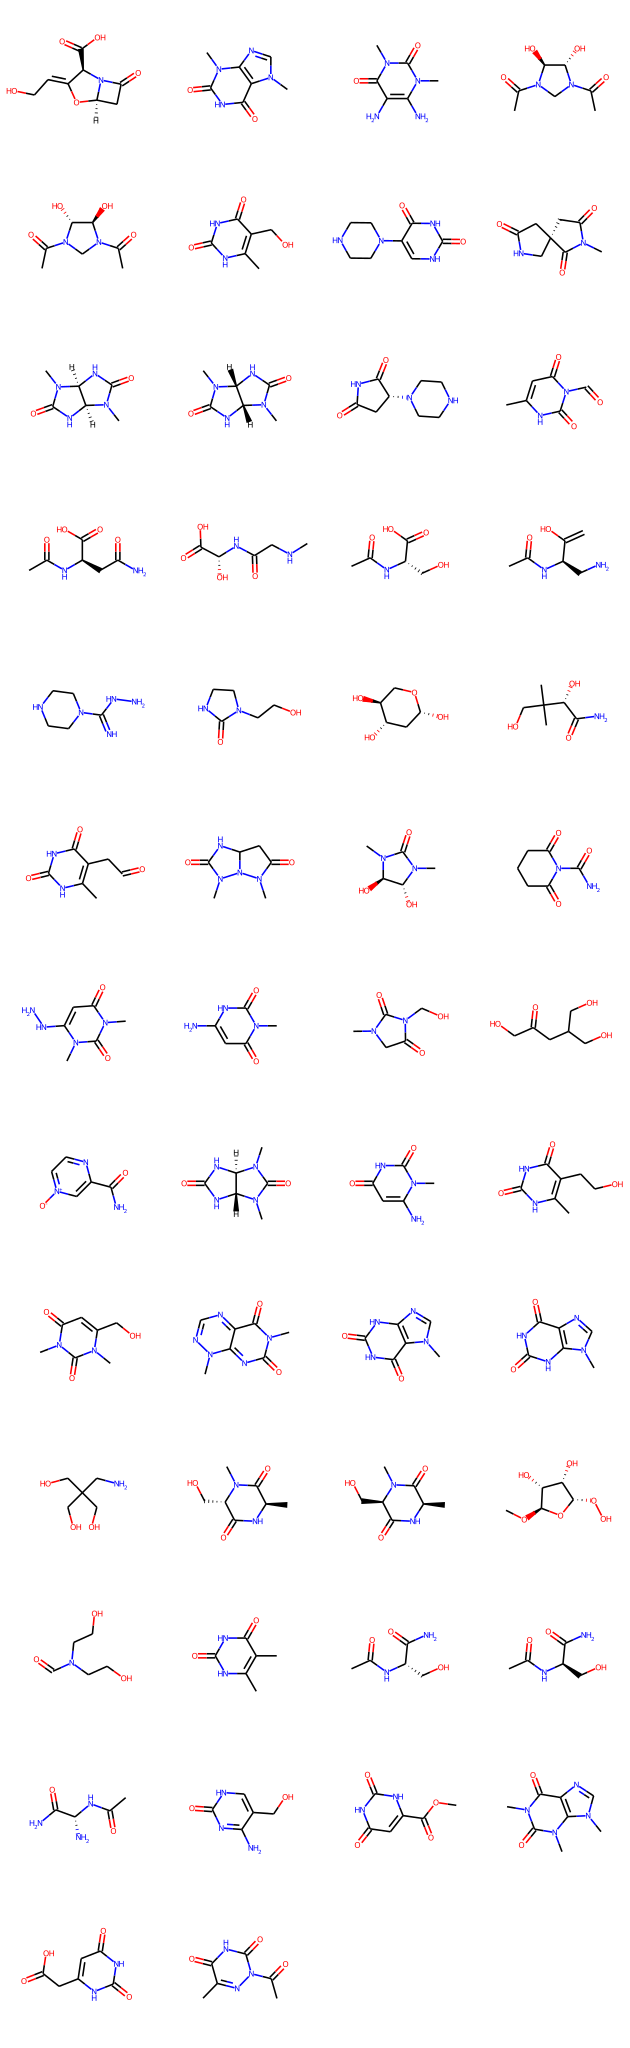

In [50]:

# Going back from vectorized form back to a readable string on Reconstructed training data
#Reconstruction

syntax_val={0:[], 1:[]}

smi_reconst_train=[]
mols_reconst_train= []

for id in range(len(X_train)):
  smi="".join([int_to_char[idx] for idx in np.argmax(reconst_train[id,:,:], axis=1)])
  # print(len(mol))
  smi = re.sub('!|E',"", smi)
  smi_reconst_train.append(smi)
  mol = Chem.MolFromSmiles(smi, sanitize=True)
  mols_reconst_train.append(mol)
  if mol is None:
    syntax_val[0].append(id)
    # print('Mol', id+1, "\t length =",len(smi), "\t invalid SMILES", sep=' ')
    # print(mol, end ='\n', sep= ' ')
    continue
  else:
    syntax_val[1].append(id)
    # print('Mol', id+1, "\t length =",len(smi), "\t",  smi, "\t Valid Smiles", sep=' ', end ='\n', flush = True)
    try:
      Chem.SanitizeMol(mol)      
    except:
      print('Mol {} {}'.format(id+1, mol)) 

smi_reconst_train_valid=[]
mols_reconst_train_valid=[]
smi_orig_train_valid=[]
mols_orig_train_valid=[]

for item in syntax_val[1]:
  smi_reconst_train_valid.append(smi_reconst_train[item].rstrip('\n'))
  smi_orig_train_valid.append(smi_orig_train[item].rstrip('\n'))

  mols_reconst_train_valid.append(mols_reconst_train[item])
  mols_orig_train_valid.append(mols_orig_train[item])

  print("Molecule", item,"Original Valid", smi_orig_train[item])
  print("Molecule" , item, "Reconstructed valid", smi_reconst_train[item])

print(len(mols_reconst_train_valid), "Reconstructed Valid Training Samples")
Draw.MolsToGridImage(mols_reconst_train_valid, molsPerRow=4,subImgSize=(200,200))



In [51]:
print("Validity Percentage of Training Reconstructed Molecules", (len(mols_reconst_train_valid)/len(mols_reconst_train))*100)
print("Validity Percentage of Testing Reconstructed Molecules", (len(mols_reconst_test_valid)/len(mols_reconst_test))*100)

Validity Percentage of Training Reconstructed Molecules 54.55145118733509
Validity Percentage of Testing Reconstructed Molecules 21.080368906455863


# **Generating New Samples from Normal Distribution**

RDKit ERROR: [08:06:55] SMILES Parse Error: syntax error while parsing: O=C1NCCCNC[C@NC(=OCCO)C
RDKit ERROR: [08:06:55] SMILES Parse Error: Failed parsing SMILES 'O=C1NCCCNC[C@NC(=OCCO)C' for input: 'O=C1NCCCNC[C@NC(=OCCO)C'
RDKit ERROR: [08:06:55] SMILES Parse Error: extra open parentheses for input: 'CNC(=N(C(CNC1CNC'
RDKit ERROR: [08:06:55] SMILES Parse Error: syntax error while parsing: O=((O)[C@H]1N1CCn[C1@H](O)[C@H](O
RDKit ERROR: [08:06:55] SMILES Parse Error: Failed parsing SMILES 'O=((O)[C@H]1N1CCn[C1@H](O)[C@H](O' for input: 'O=((O)[C@H]1N1CCn[C1@H](O)[C@H](O'
RDKit ERROR: [08:06:55] SMILES Parse Error: syntax error while parsing: NCC@@HH]CO[C@H](OO)C@@H]OO)[C@@
RDKit ERROR: [08:06:55] SMILES Parse Error: Failed parsing SMILES 'NCC@@HH]CO[C@H](OO)C@@H]OO)[C@@' for input: 'NCC@@HH]CO[C@H](OO)C@@H]OO)[C@@'
RDKit ERROR: [08:06:55] SMILES Parse Error: syntax error while parsing: NNCcNCCC1=[n1S(=O
RDKit ERROR: [08:06:55] SMILES Parse Error: Failed parsing SMILES 'NNCcNCCC1=[n1S(=O

New valid Molecule 1 NC[C@@H](O)[C@H](O)C
New valid Molecule 2 NCC(=O)N1CCN1
New valid Molecule 3 OC[C@H]1CO[C@H](O)[C@@H](O)[C@@H]1O
New valid Molecule 4 CO[C@@H]CNCCN
New valid Molecule 5 N=C(N)NC=O
New valid Molecule 6 CC[C@@H]1CNC[C@@H]1CN
New valid Molecule 7 O[C@@H]1O[C@@H](O)[C@H]1OO
New valid Molecule 8 CC(=O)c1C(N)C[C]1
New valid Molecule 9 NCCC(CCO)COO
New valid Molecule 10 CNC(CO)CNC(=O)
New valid Molecule 11 N[C@@H]1CNNCO1
New valid Molecule 12 CN(C)S(=O)(=O)NC
New valid Molecule 13 O=C(C)CNCC(O)CNC(=O)
New valid Molecule 14 CS(=O)(=O)NCCCOOCCO
New valid Molecule 15 CNC(CO)CC
New valid Molecule 16 O=CNCC([C@]1)CC(O)C1=O
New valid Molecule 17 NC[C@H](CO)CC
New valid Molecule 18 NC[C@H](N)COCC
New valid Molecule 19 CNC(CN)CCCC(=O)
New valid Molecule 20 O=C(N)CNCCCCC
New valid Molecule 21 OCN1CNc(CO)C1
New valid Molecule 22 C[C@@H](CC)N1CCNCC1
New valid Molecule 23 NCC(=O)NCC(=O)N
New valid Molecule 24 N[C@H](O)N(S(O)CCO)CO
24 Valid New Moecules


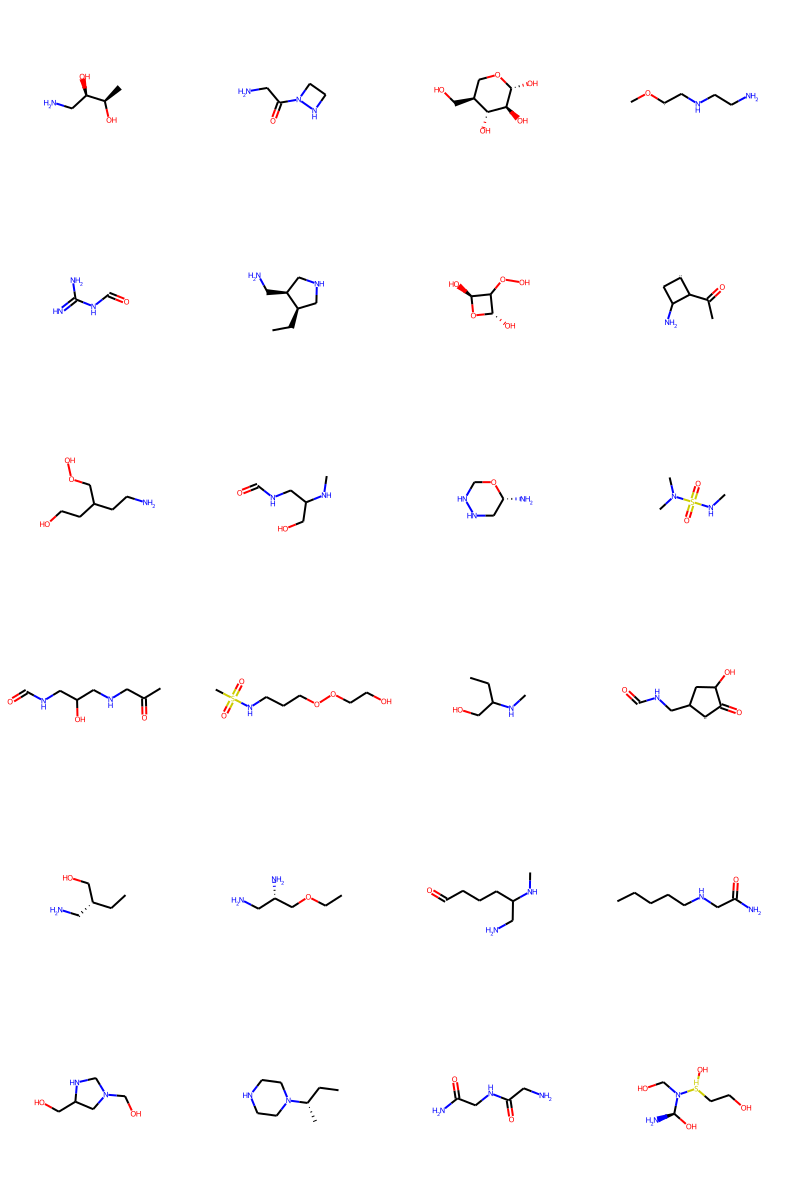

In [56]:
prop_val={}
syntax_val_new={0:[], 1:[]}


smi_reconst_new=[]
smi_reconst_new_valid=[]

mols_reconst_new= []
mols_reconst_new_valid=[]

m=None
n_mol=1000
i=0
latent_samples= np.random.normal(0,1,size=(n_mol,Z_DIM))
# print(latent_samples.shape)
# predicted_prop_samples=predictor.predict(latent_samples)


#Passing it to Decoder Now
reconst_sample = decoder.predict(latent_samples)
reconst_smi=reconst_sample.reshape(n_mol, mol_size_x, mol_size_y) 

for id, latent_mol in enumerate(reconst_smi):
  smi="".join([int_to_char[idx] for idx in np.argmax(reconst_smi[id,:,:], axis=1)])
  smi = re.sub('!|E',"", smi)
  smi_reconst_new.append(smi)

  mol = Chem.MolFromSmiles(smi, sanitize=True)
  mols_reconst_new.append(mol)
  if mol is None:
    syntax_val_new[0].append(id)
    # print('Mol', id+1, "\t length =",len(smi), "\t invalid SMILES", sep=' ')
    # print(mol, end ='\n', sep= ' ')
    continue
  else:
    syntax_val_new[1].append(id)
    # print('Mol', id+1, "\t length =",len(smi), "\t",  smi, "\t Valid New Smiles", sep=' ', end ='\n', flush = True)
    try:
      Chem.SanitizeMol(mol)      
    except:
      print('Mol {} {}'.format(id+1, mol)) 

i=1
for item in syntax_val_new[1]:
  smi_reconst_new_valid.append(smi_reconst_new[item].rstrip('\n'))
  mols_reconst_new_valid.append(mols_reconst_new[item])
  print("New valid Molecule", i, smi_reconst_new[item])
  i=i+1

print(len(mols_reconst_new_valid), "Valid New Moecules")
Draw.MolsToGridImage(mols_reconst_new_valid, molsPerRow=4,subImgSize=(200,200))


In [ ]:

smi = "Cc1ccc(c(cccCCCCCCCCCCCCCCCCCCCCCcCcCcccccccc)cccc)c1"
print(smi)
mol = Chem.MolFromSmiles(smi)
print(mol)
mol

In [ ]:
# #Checking the property of molecule
# for id, latent_mol in enumerate(latent_samples):
#   # print(id)
#   e=predicted_prop_samples[id][0]<(SAS_mean_test+SAS_std_test)
#   f=predicted_prop_samples[id][0]>=(SAS_mean_test-SAS_std_test)
#   if (syntax_val[id]==1):  #Checking if all of the property values matches
#     if (e & f):
#       prop_val[id]=1
#       print("Mol {}, Property Validated".format(id+1))
#       print("Predicted Properties=")
#       print(predicted_prop_samples[id][0])
#     else:    
#       prop_val[id]=0
#       print("Mol {}, Property Invalidated".format(id+1))  
#   else:
#     print("Invalid Molecules... Property Not Checked")
#     continue